# Deconvolution on CUDA-compatible GPUs
We will now apply [pycudadecon](https://github.com/tlambert03/pycudadecon) for 3D image deconvolution.

In [1]:
from skimage.io import imread
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt

from pycudadecon import decon

We will load an image showing fluorescent intensity along lines. This 3D image was taken with a confocal microscope.

In [2]:
image = imread('../../data/DeconvolutionSampleVerticalGrid1AU-crop.tif').astype(float)
image.shape

(21, 150, 150)

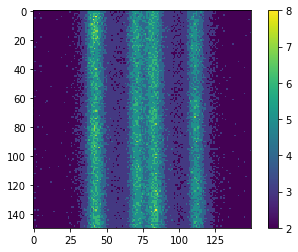

In [3]:
imshow(image, colorbar=True)

The following PSF image was extracted from images taken with the same microscope using the procedure [explained before](deconvolution:extract_psf).

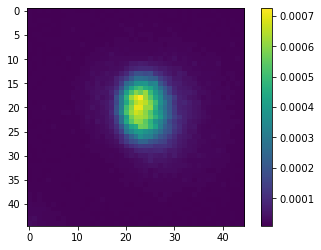

In [4]:
psf = imread('../../data/psf.tif').astype(float)

imshow(psf, colorbar=True)

We can now deconvolve the image using pycudadecon's `decon()` function. It accepts file names as well as images as input.

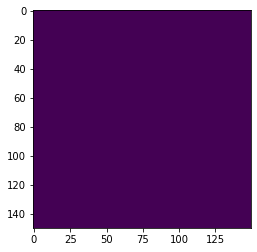

In [5]:
deconvolved = decon('../../data/DeconvolutionSampleVerticalGrid1AU-crop.tif', '../../data/psf.tif')

imshow(deconvolved)

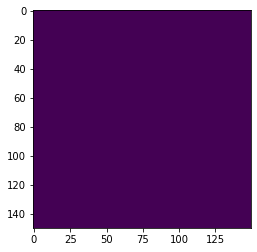

In [6]:
deconvolved = decon(image, psf)

imshow(deconvolved)

In [7]:
deconvolved.min()

0.0

In [8]:
deconvolved.max()

0.0